In [1]:
%run -i "..//startup.ipynb"

dac = DummyInstrument('dac', gates=['ch1', 'ch2'])
dmm = DummyInstrumentWithMeasurement(name='dmm', setter_instr=dac)

Logging hadn't been started.
Activating auto-logging. Current session state plus future input saved.
Filename       : C:\Users\manip.batm\.qcodes\logs\command_history.log
Mode           : append
Output logging : True
Raw input log  : False
Timestamping   : True
State          : active
Qcodes Logfile : C:\Users\manip.batm\.qcodes\logs\220203-18368-qcodes.log


In [2]:
def print_dac_values():
#     print('_____________________________________________')
#     print(
#         dac.ch1.full_name,
#         np.round(dac.ch1(),3),
#         dac.ch2.full_name,
#         np.round(dac.ch2(),3)
#     )
    time.sleep(0.02)

def print_dmm_value():
#     print(dmm.v1.full_name,dmm.v1(),)
    time.sleep(0.02)


In [3]:
# Control of quantum point contact (QPC):
qpc = controls.add_control('qpc',
            source = dac.ch1,
            move_command=print_dac_values,
            label  = r'Quantum point contact $V_{\rm QPC}$',
            unit   = 'V',
            vals   = vals.Numbers(-2.5,0.3), # limits
            )

# Control of tunnel barrier
barrier = controls.add_control('barrier',
            source = dac.ch2,
            move_command=print_dac_values,
            label  = r'Tunnel barrier $V_{\rm B}$',
            unit   = 'V',
            vals = vals.Numbers(-2.5,0.3),
            )

# Control of tunnel barrier
readout = controls.add_readout('readout',
            source = dmm.v1,
#             move_command=print_dmm_value,
            label  = r'Readout',
            unit   = 'V',
            )

def print_qpc():
    print(qpc.full_name,np.round(qpc(),3))

# Control of tunnel barrier
readout2 = controls.add_readout('readout2',
            source = qpc,
#             move_command=print_qpc,
            label  = r'Readout2',
            unit   = 'V',
            )

qpc_range = np.linspace(0.0,-2.0,11)
barrier_range = np.linspace(0.0,0.3,6)

(<AxesSubplot:>,)


Button(description='Stop', style=ButtonStyle())

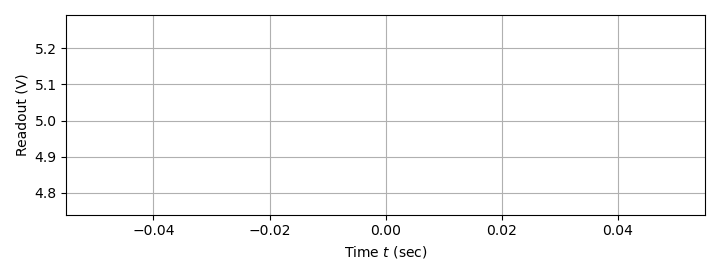

In [4]:
# Trace readouts as some changes are performed
fig = controls.trace(readout)

In [5]:
# Perform changes
controls.apply( { 'qpc': -2.0 } )
time.sleep(2)
controls.apply( { 'qpc': -1.0 } )
time.sleep(2)
controls.apply( { 'qpc': -0.0 } )

# You should see the changes of your controls in the readout-trace ...
# Then press stop ...

# Test offset, parallel sweep and repetition

In [5]:
range1 = np.linspace(0.0,-0.3,4)
offset2 = np.linspace(0.0,-0.02,3)
offset3 = np.linspace(0.0,-0.001,2)

run_id = controls.sweep(
    instructions = [
        [ 1, qpc,     range1   ],
        [ 1, barrier, range1*2 ], # parallel sweep
        [ 2, qpc,     offset2  ], # offset in 2nd dimension
        [ 3, qpc,     offset3  ], # offset in 3rd dimension
        [ 4, None,    2        ], # repeat twice in 4th dimension
    ]
)        

Starting experimental run with id: 9. 
(48, 4)
The measurement will take 0:00:01.437567.


  0%|          | 0/48 [00:00<?, ?it/s]

In [6]:
ds = load_by_id(run_id)
ds.get_parameter_data()

{'controls_barrier': {'controls_barrier': array([[ 0. , -0.2, -0.4, -0.6]])},
 'controls_qpc': {'controls_qpc': array([[ 0. , -0.1, -0.2, -0.3]])},
 'controls_readout': {'controls_readout': array([5.07580973, 5.06685939, 5.21999577, 5.26884816, 4.95406694,
         5.03962929, 5.08309585, 5.09946262, 5.06889654, 5.05114554,
         5.24318121, 5.29913515, 4.98675568, 5.06940346, 5.18031149,
         5.10778477, 5.15526245, 5.15696015, 5.30121091, 5.34150662,
         5.03578814, 5.30181981, 5.04768954, 5.26926811, 5.06396046,
         5.23645211, 5.08842728, 5.33507319, 5.00353047, 5.08648959,
         5.33937394, 5.27175979, 4.95628925, 5.19885284, 5.31791206,
         5.35479947, 5.04964517, 5.24258431, 5.29322759, 5.48422365,
         5.14108616, 5.31833928, 5.28696772, 5.33785687, 5.04254673,
         5.00443861, 5.27027924, 5.39921013])},
 'controls_readout2': {'controls_readout2': array([ 0.   , -0.1  , -0.2  , -0.3  , -0.01 , -0.11 , -0.21 , -0.31 ,
         -0.02 , -0.12 , -0.

In [7]:
ds

results #9@D:\OneDrive\Jobs\PhD\Scripts\repositories\qube\tests\jupyter\20220202__experiment__sample\measurements\experiments.db
--------------------------------------------------------------------------------------------------------------------------------
controls_qpc - array
sweep_dims - numeric
controls_barrier - array
fast_sweep - numeric
note - text
controls_readout - numeric
sweep_full_names - text
sweep_names - text
counter_dim4 - array
offset_qpc_dim3 - array
offset_qpc_dim2 - array
readout_names - text
shape - numeric
readout_full_names - text
return2initial - numeric
shape_dims - numeric
controls_readout2 - numeric

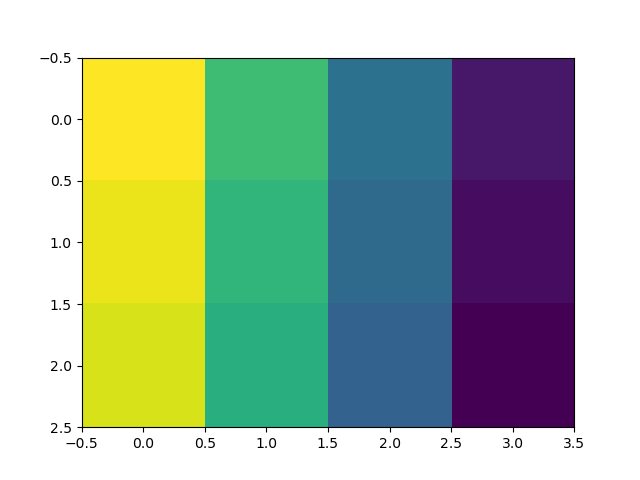

In [8]:
data_raw = ds.get_parameter_data()['controls_readout2']['controls_readout2']
shape = ds.get_parameter_data()['shape']['shape'].astype(int)
data = np.reshape(data_raw,shape)
data.shape

plt.figure()
plt.imshow(data[0,0])

# Test 2D sweep

In [9]:
run_id = controls.sweep(
    instructions = [
        [ 1, qpc,     qpc_range     ],
        [ 2, barrier, barrier_range ],
    ]
)                                  

Starting experimental run with id: 10. 
(66, 2)
The measurement will take 0:00:02.010627.


  0%|          | 0/66 [00:00<?, ?it/s]

In [10]:
ds = load_by_id(run_id)
ds.get_parameter_data()

{'controls_barrier': {'controls_barrier': array([[0.  , 0.06, 0.12, 0.18, 0.24, 0.3 ]])},
 'controls_qpc': {'controls_qpc': array([[ 0. , -0.2, -0.4, -0.6, -0.8, -1. , -1.2, -1.4, -1.6, -1.8, -2. ]])},
 'controls_readout': {'controls_readout': array([4.90467537, 5.29171863, 5.45190563, 5.4966668 , 5.98992683,
         6.02549717, 6.42554301, 6.49650725, 6.92446005, 7.11033049,
         7.39837578, 4.91924591, 5.0921812 , 5.2491006 , 5.70933672,
         5.88828097, 6.10684788, 6.47634135, 6.68913234, 7.06812926,
         7.19841169, 7.37149597, 5.13803032, 5.14558922, 5.51171352,
         5.46722993, 6.04137375, 6.05948842, 6.31546769, 6.59328603,
         6.82381602, 7.17601337, 7.38290411, 4.90003058, 5.21613611,
         5.44050546, 5.52028246, 5.9505577 , 6.19552534, 6.54010615,
         6.62897222, 6.95857538, 7.22204807, 7.32710952, 4.8956492 ,
         5.1435763 , 5.42228749, 5.65507446, 5.94393525, 6.00820597,
         6.36559607, 6.58081891, 6.93377287, 7.0951936 , 7.45634848,

In [11]:
from qube.helpers.qcodes_layout import display_layout

['']
sweep_dim 1
sweep_dim 2


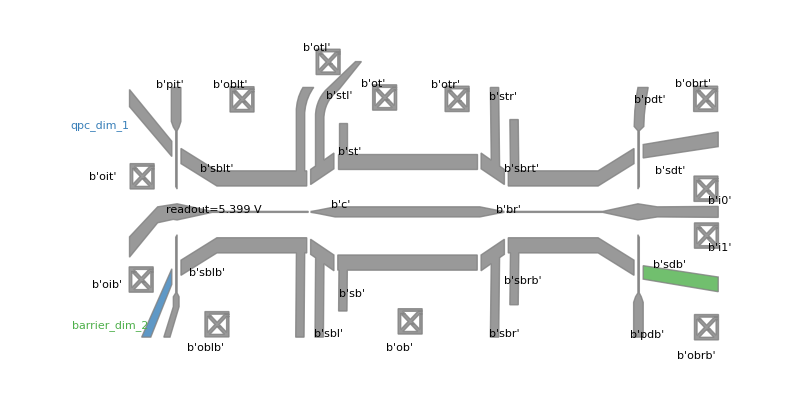

In [12]:
display_layout(controls,run_id)

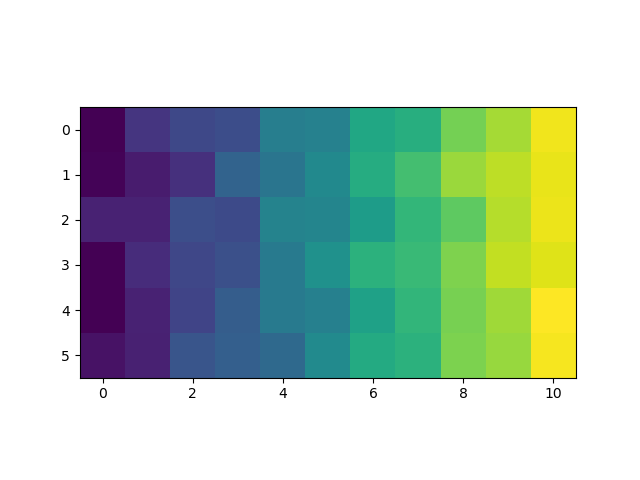

In [13]:
shape = ds.get_parameter_data()['shape']['shape'].astype(int)
X = ds.get_parameter_data()['controls_readout']['controls_readout']
X = np.reshape(X,shape)
plt.figure()
plt.imshow(X)

In [ ]:
dataset = convert_for_plotter(run_id)
Plot1D(dataset)

In [ ]:
from qcodes import Measurement
from qcodes.instrument.parameter import (
    Parameter, ManualParameter,
    DelegateParameter)
from qcodes import validators as vals

meas = Measurement(name=None)

something1 = Parameter('something1',vals=vals.Strings())
meas.register_parameter(something1,paramtype='text')
something2 = Parameter('something2',vals=vals.Strings())
meas.register_parameter(something2,paramtype='text')
additional_info = Parameter('additional_info',vals=vals.Strings())
meas.register_parameter(additional_info, setpoints=(something1,something2))

meas.register_parameter(qpc,paramtype='array')  # register the first independent parameter
meas.register_parameter(barrier,paramtype='array')  # register the first independent parameter
meas.register_parameter(readout, setpoints=())  # now register the dependent oone

# meas.set_shapes({readout.full_name: (6,11)})
                 
print(meas.parameters['controls_qpc'])

with meas.run() as datasaver:
#     print(help(datasaver.add_result))
#     for set_v2 in np.linspace(0, -2.0, 6):
#         datasaver.add_result((barrier, set_v2))

#     for set_v in np.linspace(0, -2.0, 11):
#         datasaver.add_result((qpc, set_v))

    datasaver.add_result((barrier, barrier_range))
    datasaver.add_result((qpc,  qpc_range))    
    
    for set_v2 in barrier_range:
        for set_v in qpc_range:
            print('_______________________')
            qpc.set(set_v)
            barrier.set(set_v2)
            print('barrier',set_v2,'qpc',set_v,)
            get_v = readout.get()
            print(get_v)
            datasaver.add_result((readout, get_v))

    datasaver.add_result(
        (additional_info, 'funny'),
        (something1, 'funny1'),
        (something2, 'funny2')
    )


#     datasaver.dataset.add_results((something, 'funny'))
    dataset1D = datasaver.dataset  # convenient to have for data access and plotting
    print('finished')

In [ ]:
help(datasaver.add_result)

In [ ]:
dataset1D.get_parameter_data()

In [ ]:
X = dataset1D.get_parameter_data()['controls_readout']['controls_readout']
X = np.reshape(X,(6,11))
plt.figure()
plt.imshow(X)

In [ ]:
plt.figure()
for i in np.arange(5):
    x = [0,5]
    y = [i,i]
    color = plt.cm.Set1(i-1)
    plt.plot(x,y,color=color)

In [ ]:
np.array([1.2,4.5]).astype(int)

In [ ]:
controls.sub

In [ ]:
N = 201
srange = -1.0+np.sin(np.linspace(0.0,5*np.pi,N))
brange = np.linspace(0.0,-2.0,N)

controls.sweep(
[
    [1,barrier,brange],
    [1,qpc,srange],
]
)

In [ ]:
explore1d(51)

In [ ]:
data_set = load_by_id(51)
data_dict = data_set.get_parameter_data()


In [ ]:
data_dict['readout_names']['readout_names']

In [ ]:
qpc.full_name

In [ ]:
convert